# Goal

Study differential equations in 2 dimentions by drawing out their phase planes. This will have three parts:
    
### 1. Linear Differential Equations
    
We start by only considering linear phase planes $z' = Az, A \in \mathbb{R}^{2 \times 2 }$

### 2. General Differential Equations

We draw the phase plane for general equations. This can be done easily with the aid of a computer, not so much by hand.

### 3. Linearization of phase planes around equilibrium points

We can find equilibrium points easily, and by linearizing the differential equations around this points we can understand their behavior

# Imports

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

# Aux function

In [2]:
class PhasePlane():
    # Class used to draw phase planes. x_prime and y_prime must be real functions of 2 parameters, x and y.

    def __init__(self, x_prime, y_prime):
        self.x_prime = x_prime
        self.y_prime = y_prime

    def plot(self, width = 3, center = (0,0)):
        Y, X = np.mgrid[-width:width:100j, -width:width:100j]
        X += center[0]
        Y += center[1]
        U = np.array([self.x_prime(x,y) for (x,y) in zip(X,Y)])
        V = np.array([self.y_prime(x,y) for (x,y) in zip(X,Y)])
        speed = np.sqrt(U**2 + V**2)
        fig, ax = plt.subplots(figsize=(10,5)) 

        strm = ax.streamplot(X, Y, U, V, color=U, linewidth=1, cmap='viridis')
        fig.colorbar(strm.lines)
        ax.set_title('Phase Plane')

# 1. Linear Differential Equations

Whenever we have a differential equation of the form $z' = Az, A \in \mathbb{R}^{2 \times 2 }$, the behaviour of the solutions is scale invariant (i.e. when the magnitude of $z$ increases, the magnitude of $z'$ increases proportionally), which gives us scaling symmetry. As such the solutions always end up in one of the following four cases, which can be immediately distinguished by calculating the eigenvalues $\lambda_1 , \lambda_2 $ of $A$: 

1. **Node:** $\lambda_1 \lambda_2 > 0$
2. **Saddle:** $\lambda_1 \lambda_2 < 0$
3. **Focus:** $\Re ( \lambda_1 ) , \Re (\lambda_2) \neq 0$
4. **Center:** $\Re ( \lambda_1 ) , \Re (\lambda_2) = 0$

If at least one of the eigenvalues (or their real part) is positive, the equilibrium point will be unstable. If both are negative, then it will be stable and any starting point around it will converge to the equilibrium point

*Remarks:*
- *$\Re ( \lambda ) $ denotes the real part of $ \lambda $*
- *In the plots below yellow represents higher "speed", blue represents "lower" speed*

### Stable Node

$ A = \begin{bmatrix} -2 & 1\\ 1 & -2 \end{bmatrix} $ with eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = -1 \implies & v = [1,1]\\ \lambda = -3 \implies & v = [1,-1] \end{matrix} \right . $

Since the eigenvalues are negative, this is a **stable** equilibrium: all paths converge to the $(0,0)$ point

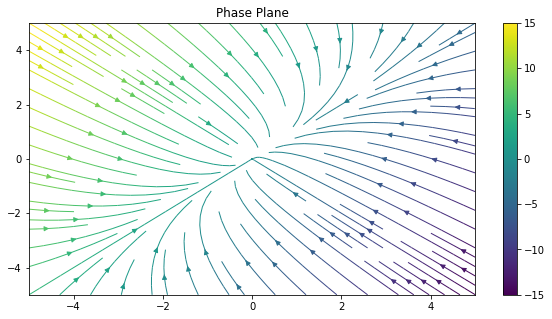

In [3]:
PhasePlane(lambda x,y: -2*x+y, lambda x,y: +x-2*y).plot(width = 5)

### Unstable Node

$ A = \begin{bmatrix} 1 & -1\\ 0 & 2 \end{bmatrix} $ with eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = 1 \implies & v = [1,0]\\ \lambda = 2 \implies & v = [1,-1] \end{matrix} \right . $

Since the eigenvalues are positive, this is an **unstable** equilibrium : all path solutions diverge from $(0,0)$

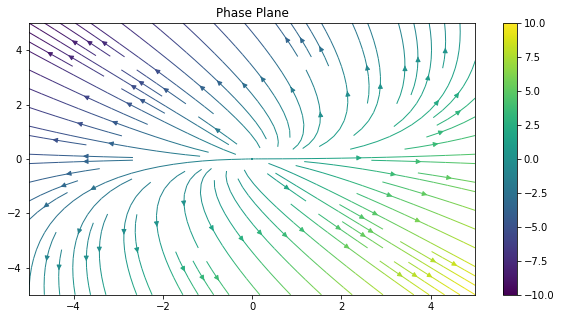

In [4]:
PhasePlane(lambda x,y: x - y, lambda x,y: 2*y).plot(width = 5)

### Saddle

$ A = \begin{bmatrix} 1 & 0\\ 1 & -1 \end{bmatrix} $ with eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = 1 \implies & v = [2,1]\\ \lambda = -1 \implies & v = [0,1] \end{matrix} \right . $

Notice how the eigenvectors are clear in the image below: The $ \lambda = -1 $ is observed in the convergence along the vector $[0,1]$, and the $ \lambda = 1 $ is observed in the divergence along the vector $[2,1]$

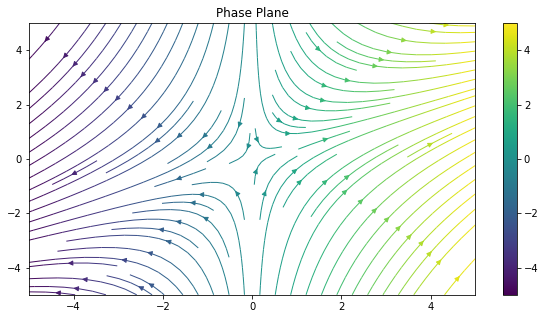

In [5]:
PhasePlane(lambda x,y: x, lambda x,y: x - y).plot(width = 5)

### Stable Focus

$ A = \begin{bmatrix} -1 & 4\\ -1 & -1 \end{bmatrix} $ with eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = -1 + 2i \implies & v = [2i,-1]\\ \lambda = -1-2i \implies & v = [2i,1] \end{matrix} \right . $

Since the real part of the eigenvalues is negative, we get that $(0,0)$ is a stable focus, and the solution paths rotate around it while converging

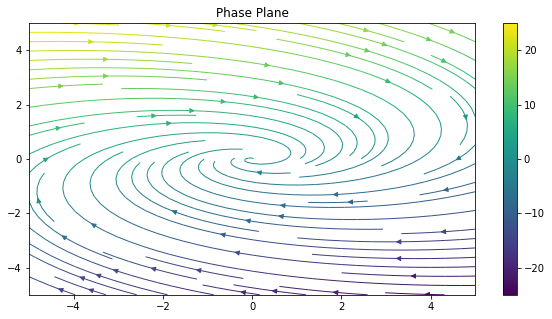

In [6]:
PhasePlane(lambda x,y: -x+4*y, lambda x,y: -x-y).plot(width = 5)

### Unstable Focus

$ A = \begin{bmatrix} 1 & 4\\ -1 & 1 \end{bmatrix} $ with eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = 1 + 2i \implies & v = [2i,-1]\\ \lambda = 1-2i \implies & v = [2i,1] \end{matrix} \right .$

Since the real part of the eigenvalues is positive, we get that $(0,0)$ is an unstable focus, and the solution paths rotate around it while diverging

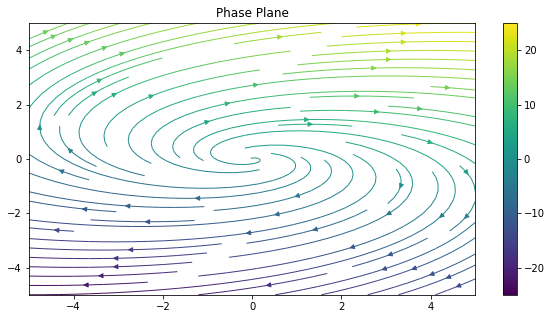

In [7]:
PhasePlane(lambda x,y: x+4*y, lambda x,y: -x+y).plot(width = 5)

### Center

$ A = \begin{bmatrix} 0 & 4\\ -1 & 0 \end{bmatrix} $, with eigenvalues /eigenvectors $\left\{ \begin{matrix} \lambda = 2i \implies & v = [2,i]\\ \lambda = -2i \implies & v = [2,-i] \end{matrix} \right .$

Since the real part of the eigenvalues is zero, we get that $(0,0)$ is a center, and the solution paths rotate around it.

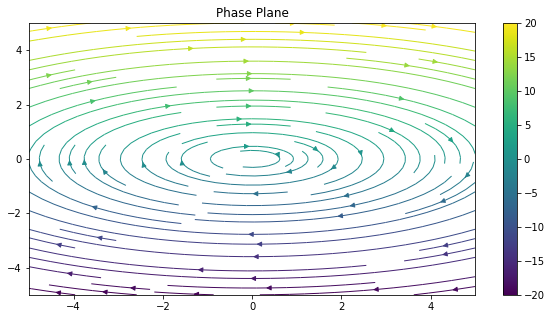

In [8]:
PhasePlane(lambda x,y: 4*y,lambda x,y: -x).plot(width = 5)

### Weird One

$ A = \begin{bmatrix} -1 & 1\\ 1 & -1 \end{bmatrix} $, with eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = 0 \implies & v = [1,1]\\ \lambda = -2 \implies & v = [1,-1] \end{matrix} \right. $

We get an eigenvalue of zero with eigenvector $[1,1]$, meaning that all points in that line are equilibrium points, and no solution paths cross it. Above and below that line we get solutions. This example can be seen as a limit case of the center equilibrium, where the speed along one of the eigenvectors converges to zero, so the ellipse around it gets elongated to infinity

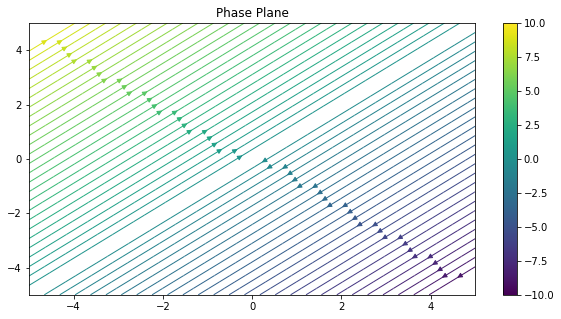

In [9]:
PhasePlane(lambda x,y: - x + y, lambda x,y: y - x).plot(width = 5)

# 2. General Differential Equations

General Differential Equations have much weirder phase planes. We simply showcase a few below, without much study around it

### Case Study

$ \left\{\begin{matrix}
x' = & x^2 + y^2 \\ 
y' = & x^2 - y^2
\end{matrix}\right. $

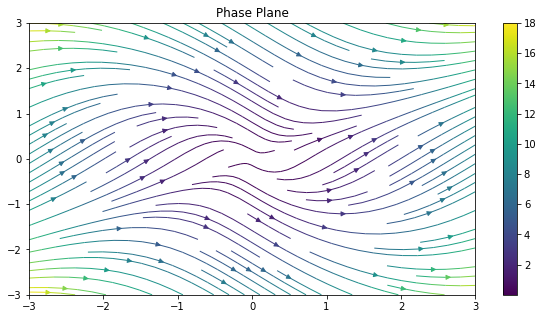

In [10]:
PhasePlane(lambda x,y: x**2 + y**2, lambda x,y: x**2 - y**2).plot()

### Case Study

$ \left\{\begin{matrix}
x' = & x + y^2 \\ 
y' = & x^2 - y^2
\end{matrix}\right. $

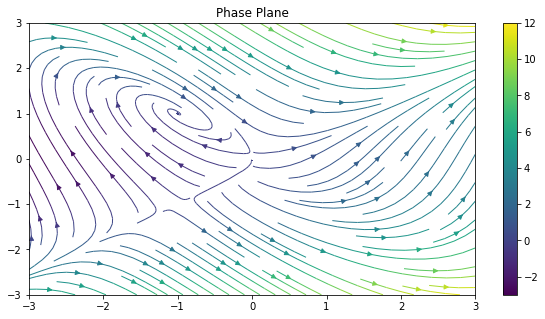

In [11]:
PhasePlane(lambda x,y: x + y**2, lambda x,y: x**2 - y**2).plot()

### Case Study

$ \left\{\begin{matrix}
x' = & \sin ( y ) \\ 
y' = & \cos ( x )
\end{matrix}\right. $

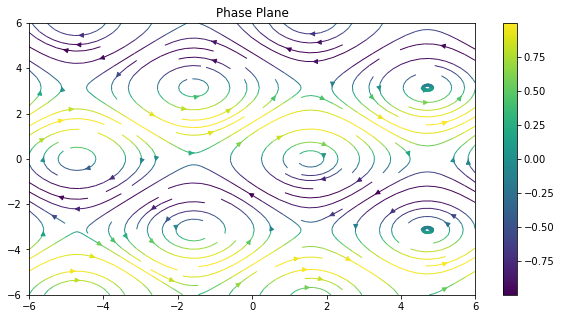

In [12]:
PhasePlane(lambda x,y: np.sin(y), lambda x,y: np.cos(x)).plot(width=6)

### Case Study

$ \left\{\begin{matrix}
x' = & - x / y \\ 
y' = & x-y
\end{matrix}\right. $

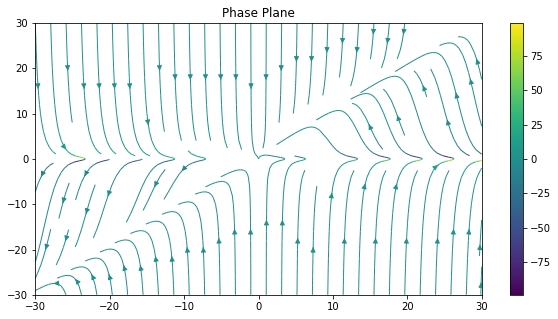

In [13]:
PhasePlane(lambda x,y: -np.divide(x,y), lambda x,y: x-y).plot(width=30)

# 3. Linearization of phase planes around equilibrium points

### Case study

$ \left\{\begin{matrix}
x' = & (1-x^2)(x+y) \\ 
y' = & (x^2 + y^2-1)
\end{matrix}\right. $

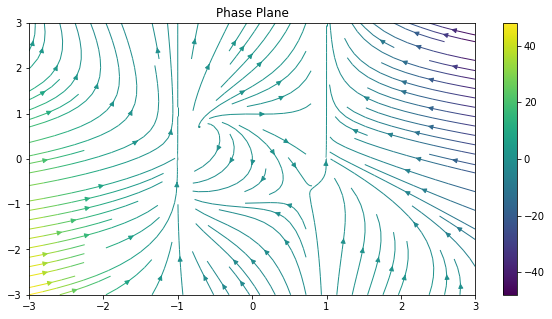

In [14]:
phase_plane = PhasePlane(lambda x,y: (1- x**2)*(x+y), lambda x,y: (x**2 + y**2 - 1))
phase_plane.plot()

By solving the system of equations 

$ \left\{\begin{matrix}
x' & = & 0 \\ 
y' & = & 0
\end{matrix}\right. \Leftrightarrow \left\{\begin{matrix}
(1-x^2)(x+y) & = & 0 \\ 
(x^2 + y^2-1) & = & 0
\end{matrix}\right. $

we get the equilibrium points


$(1,0)\\ (-1,0)\\ \frac{1}{\sqrt{2}} ( 1, -1)\\ \frac{1}{\sqrt{2}}( -1, 1)$

#### Studying the equilibrium point $(1,0)$

First lets have a look at the phase plane around this equilibrium below. It converges so it looks like a stable node.

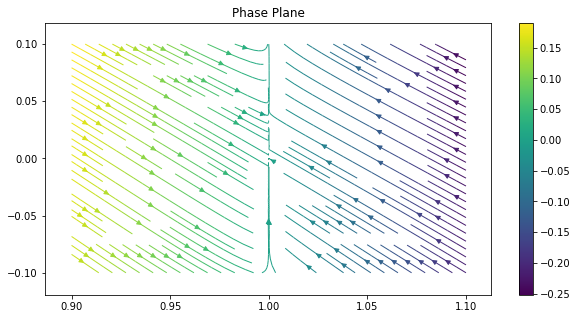

In [15]:
phase_plane.plot(center = (1,0), width = .1)

Analytically, this can be done by linearizing the set of equations around $(1,0)$, similar to how Taylor Series are calculated. Given a general equilibrium point $(x_0, y_0)$, and the diferential equation given by $[x',y'] = f(x,y) $, we want to write

$(x', y') \approx f(x_0,y_0) + \frac{\partial}{\partial x} f(x,y) \Big|_{(x_0,y_0)} (x-x_0) + \frac{\partial}{\partial y} f(x,y)\Big|_{(x_0,y_0)} (y-y_0)$

To make better sense of this, let's quickly apply this to our example. We have

$ \left\{\begin{matrix}
x' = & (1-x^2)(x+y) \\ 
y' = & (x^2 + y^2-1)
\end{matrix}\right. $

so

$f(x,y) = \left [ \begin{matrix}
(1-x^2)(x+y) \\ 
(x^2 + y^2-1)
\end{matrix}\right ] $

$ \frac{\partial}{\partial x} f(x,y)\Big|_{(1,0)} = \left [ \begin{matrix}
-2x(x+y) + (1-x^2) \\ 
2x 
\end{matrix}\right ]\Big|_{(1,0)} = \left [ \begin{matrix} -2 \\ 2 \end{matrix}\right ]$

$ \frac{\partial}{\partial y} f(x,y)\Big|_{(1,0)} = \left [ \begin{matrix}
(1-x^2) \\ 
2y 
\end{matrix}\right ]\Big|_{(1,0)} = \left [ \begin{matrix} 0 \\ 0 \end{matrix}\right ]$

By concatenating the 2 matrices, we get that 

$ \left [ \begin{matrix} x' \\ y' \end{matrix}\right ] \approx 
\left [ \begin{matrix}
-2 & 0\\ 
2 & 0
\end{matrix}\right ]
\left [ \begin{matrix} x-1 \\ y \end{matrix}\right ]
$

By analysing the matrix $A= \left [ \begin{matrix} -2 & 0\\ 2 & 0 \end{matrix}\right ]$, we get the eigenvalues / eigenvectors $\left\{ \begin{matrix} \lambda = 0 \implies & v = [0,1]\\ \lambda = -2 \implies & v = [1,-1] \end{matrix} \right. $

Indeed, we notice that along the vector $[1,-1]$ we converge to the equilibrium point, whereas aling the vector $[0,1]$ no lines cross.

Since this linearization only gives us an approximation of the actual solution, I compare below the phase plane of the original equation with the phase plane of the linearized approximation.

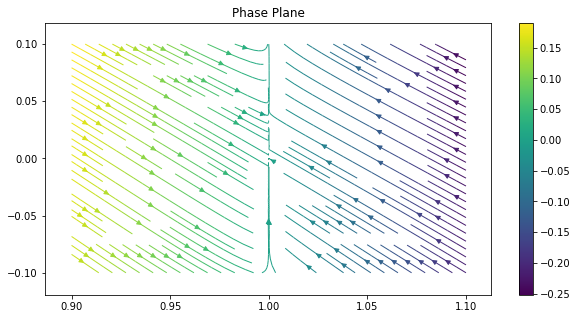

In [16]:
phase_plane.plot(center = (1,0), width = .1)

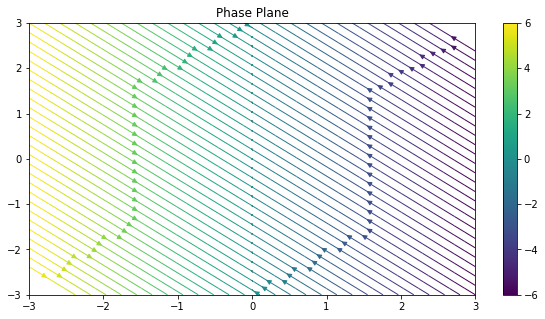

In [17]:
PhasePlane(lambda x,y: -2*x, lambda x,y: 2*x).plot()

# Playground

Use this cell to test out the phase plane for linear differential equations $z' = Az, A \in \mathbb{R}^{2 \times 2 }$, with $A= \left [ \begin{matrix} a & b\\ c & d \end{matrix}\right ]$

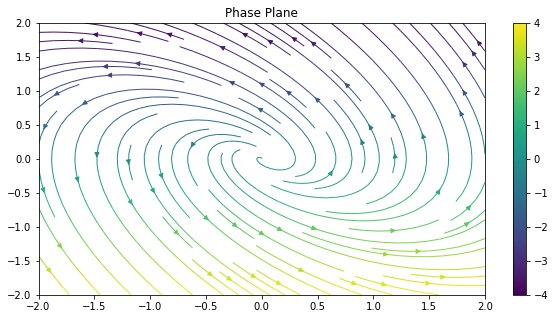

In [18]:
a = 0
b = -2
c = 2
d = 2

PhasePlane(
    lambda x,y: a*x + b*y,
    lambda x,y: c*x + d*y
).plot(
    width=2
)